In [16]:
%load_ext autoreload
%autoreload 0
%autoreload 2

In [17]:
# import os
from glob import glob

from imageio import imread, imwrite
import numpy as np
import matplotlib.pyplot as plt
import random, os

# import logging
# logging.basicConfig(level=logging.INFO)

import astimp
import inhib_diameter_modes as inhib

error with the creteil picture database folder
/Users/marco/Downloads/Amman routine AST pictures/20190206-ECL-179.jpg


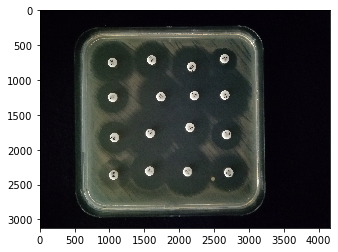

In [25]:
class Dataset():
  def __init__(self, image_folder):
    assert os.path.exists(image_folder)
    self.image_folder = image_folder
    self.paths = glob(image_folder + '/*.jpg')
    
try:
  amman = Dataset('/Users/marco/Downloads/Amman routine AST pictures/')
except:
  print("error with the amman picture database folder")

try:
  creteil = Dataset('imgs/creteil')
except AssertionError:
  print("error with the creteil picture database folder")

try:
  improc_test = Dataset("../../tests/images")
except AssertionError:
  print("error with the improc test folder")

this_ds = amman

## LOAD RANDOM IMAGE FROM IMPROC TEST IMAGES
# path = random.choice(this_ds.paths)

path = os.path.join(amman.image_folder, "20190206-ECL-179.jpg")
print(path)
img = np.array(imread(path))  # load image
plt.imshow(img)

In [26]:
astimp.config.Inhibition_diameterReadingSensibility = 0.5;
print(astimp.config.Inhibition_diameterReadingSensibility)

# image processing
crop = astimp.cropPetriDish(img)  # crop Petri Dish
circles = astimp.find_atb_pellets(crop)  # find pellets
preproc = astimp.inhib_diam_preprocessing(crop, circles)  # create preprocessing object
# px_per_mm = 1/astimp.get_mm_per_px(circles)

0.5


diameter = 6mm confidence: 1
ASTIMP diameter = 6mm confidence: 1.0


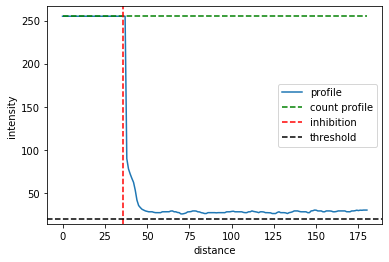

In [30]:
pellet_idx = 11

y = np.array(astimp.radial_profile(preproc,pellet_idx,astimp.profile_type["max"]))
diameter, cp, pellet_end, y_count, data, mse, confidence = inhib.count._measureOneDiameter(preproc, pellet_idx)
print("diameter = {:.0f}mm".format(diameter), "confidence:", confidence)

inDisk = astimp.measureOneDiameter(preproc, pellet_idx)
print("ASTIMP", "diameter = {:.0f}mm".format(inDisk.diameter), "confidence:", inDisk.confidence)

plt.plot(y, label="profile")
plt.plot(y_count, 'g--', label="count profile")
plt.axvline(cp, color = 'r', ls = '--', label="inhibition")
# plt.axvline(pellet_end, color = 'k', ls = '--', label="pellet end")

plt.axhline(preproc.km_thresholds_local[pellet_idx], color='k', ls='--', label="threshold")
# plt.axhline(preproc.km_threshold, color='k', ls='--', label="threshold g")

plt.legend()

plt.xlabel("distance")
plt.ylabel("intensity");

In [31]:
print(preproc.km_centers_local[pellet_idx], preproc.km_centers)

[16, 25, 253] [28, 61, 254]


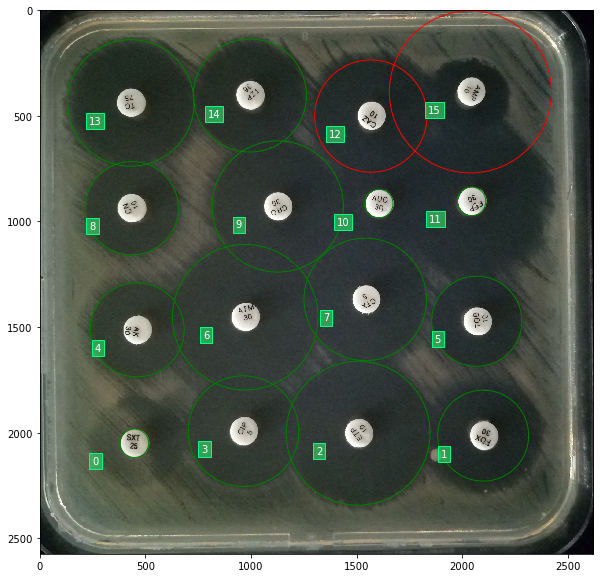

In [29]:
### PLOTTING ###
plt.figure(figsize=(10,10))

ax =plt.gca()
ax.imshow(crop)
for j in range(len(circles)):
    center = circles[j].center
    temp = np.array(center)+[-200,+100]
    s = f"{j}"
    bbox=dict(boxstyle="square", ec=(0, 1, 0.5), fc=(0.2, 0.8, 0.4,0.7))
    text = plt.Text(*temp, s, color='w', bbox=bbox)
    ax.add_artist(text)

    center = circles[j].center
    diameter, cp, pellet_end, y_count, data, mse, confidence = inhib.count._measureOneDiameter(preproc, j,
                                                preproc.km_thresholds_local[j])

    r_inhib = cp/preproc.scale_factor
    if confidence < 1:
      color = 'r'
    else:
      color = 'g'
    circle = plt.Circle(center, r_inhib, ec=color, fc='none', alpha=1)
    ax.add_artist(circle)

inhibition_diameter = 21mm
fit cost = 3.8520370235298986
confidence =  0.8958908912559487


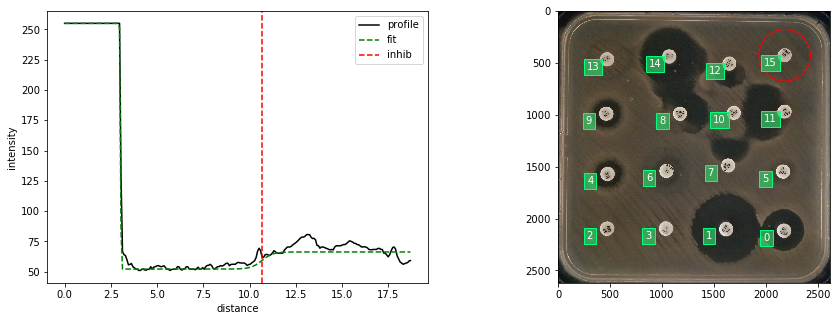

In [8]:
pellet_idx=15

diameter, idx, fit_cost, (left, right), fit, th_v = inhib.nlclsq._measureOneDiameter(preproc, pellet_idx)

print("inhibition_diameter = {:.0f}mm".format(diameter))
print("fit cost =", fit_cost)

# this definition of confidence is just an idea.
print("confidence = ", 1 - min(1,fit_cost/(preproc.km_centers[1]-preproc.km_centers[0])))

### PLOTTING ###
from inhib_diameter_modes.nlclsq import inhib_model
y = np.array(astimp.radial_profile(preproc,pellet_idx,astimp.profile_type["max"]))
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(np.arange(len(y))/preproc.px_per_mm, y, 'k', label="profile")
x = np.arange(len(y))/preproc.px_per_mm
axs[0].plot(x,inhib_model(fit.x, range(-left,len(y)-left), 255),"g--",label="fit")
axs[0].axvline(idx/preproc.px_per_mm, color='r', ls='--', label="inhib")
axs[0].legend()
axs[0].set_xlabel("distance")
axs[0].set_ylabel("intensity")

axs[1].imshow(crop)
for j in range(len(circles)):
    center = circles[j].center
    temp = np.array(center)+[-200,+100]
    s = f"{j}"
    bbox=dict(boxstyle="square", ec=(0, 1, 0.5), fc=(0.2, 0.8, 0.4,0.7))
    text = plt.Text(*temp, s, color='w', bbox=bbox)
    axs[1].add_artist(text)

center = circles[pellet_idx].center
r_inhib = idx/preproc.scale_factor
circle = plt.Circle(center, r_inhib, ec='r', fc='none', alpha=1)
axs[1].add_artist(circle)

# axs[0].axhline(th_v, color='k', ls='--')


Text(0, 0.5, 'intensity')

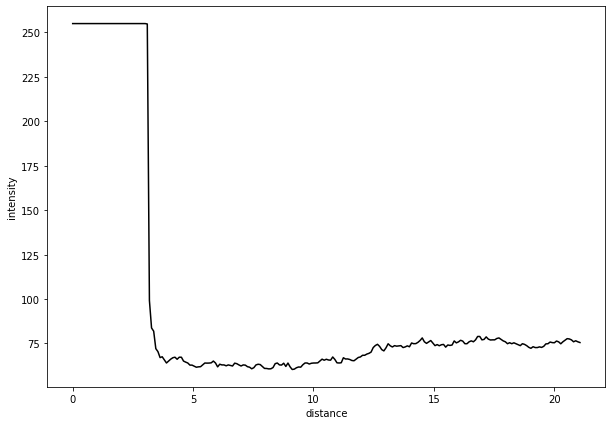

In [15]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(len(y))/preproc.px_per_mm, y, 'k', label="profile")
# plt.axhline(108, color='m', ls='--', label='max')
# plt.axhline(36, color='b', ls='--', label='min')
# plt.axhline((108+36)/2, color='g', ls='--', label='(max-min)/2')
# plt.axvline(8.2, color='r', ls='--', label='diameter')

plt.xlabel("distance")
plt.ylabel("intensity")
# plt.legend()

In [8]:
# print(*fit.x)
# print(preproc.km_centers)

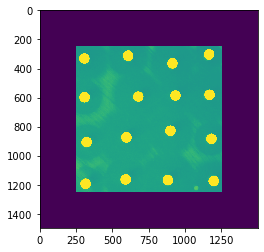

In [9]:
plt.imshow(preproc.img)

diameter = 13mm
67.48864721638346 76.5 198


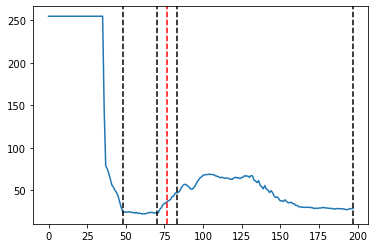

In [10]:
# import inhib_diameter_modes as inhib

diameter, cp, cpts, offset, y_temp, penalty = inhib.slopeOP._measureOneDiameter(preproc, pellet_idx,
                                                                      constraint='isotonic')
print("diameter = {:.0f}mm".format(diameter))
y = np.array(astimp.radial_profile(preproc,pellet_idx,astimp.profile_type["max"]))
plt.plot(y)
for c in cpts:
  plt.axvline(c, color='k', ls='--')
plt.axvline(cp, color='r', ls='--')
# plt.plot(y_temp)
print(penalty, cp, len(y))

SlopeOP unimodal

diameter = 10mm
67.48864721638346


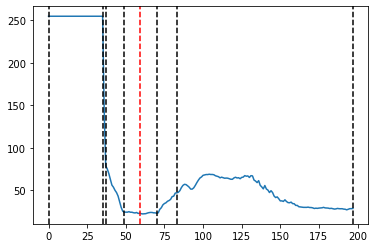

In [11]:
# import inhib_diameter_modes as inhib

diameter, cp, cpts, offset, y_temp, penalty = inhib.slopeOP._measureOneDiameter(preproc, pellet_idx, constraint='unimodal')
print("diameter = {:.0f}mm".format(diameter))
y = np.array(astimp.radial_profile(preproc,pellet_idx,astimp.profile_type["max"]))
plt.plot(y)
for c in cpts:
  plt.axvline(c, color='k', ls='--')
plt.axvline(cp, color='r', ls='--')
print(penalty)

op1

diameter = 20mm


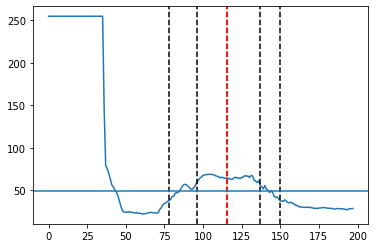

In [12]:
import inhib_diameter_modes as inhib

diameter, cp, opresult = inhib.op._measureOneDiameter(preproc, pellet_idx, dimensions=1)
y = np.array(astimp.radial_profile(preproc,pellet_idx,astimp.profile_type["max"]))
print("diameter = {:.0f}mm".format(diameter))

plt.plot(y)
plt.axvline(cp, color='r', ls='--')

if opresult is not None:
  for x in opresult.cp:
    plt.axvline(x, color='k', ls='--')
  plt.axvline(cp, color='r', ls='--')
  
plt.axhline(preproc.km_threshold)

op2d

diameter = 25mm


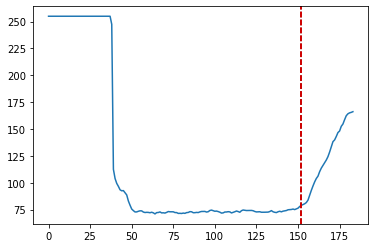

In [10]:
diameter, cp, opresult = inhib.op._measureOneDiameter(preproc, pellet_idx, dimensions=2)
y = np.array(astimp.radial_profile(preproc,pellet_idx,astimp.profile_type["max"]))

print("diameter = {:.0f}mm".format(diameter))
plt.plot(y)

plt.axvline(cp, color='r', ls='--')

if opresult is not None:
  for x in opresult.cp:
    plt.axvline(x, color='k', ls='--')
  plt.axvline(cp, color='r', ls='--')

In [11]:
preproc.km_compactness_local[pellet_idx]
preproc.km_centers_local[pellet_idx]

[68, 137, 254]

In [370]:
for i in range(len(preproc.circles)):
  print(i,preproc.km_centers_local[i])

0 [43, 68, 253]
1 [31, 64, 253]
2 [38, 67, 252]
3 [42, 65, 253]
4 [43, 68, 253]
5 [31, 60, 254]
6 [41, 68, 253]
7 [38, 64, 253]
8 [38, 70, 254]
9 [36, 67, 254]
10 [27, 36, 253]
11 [23, 32, 253]
12 [23, 34, 252]
13 [31, 70, 254]
14 [31, 67, 252]
15 [22, 80, 253]


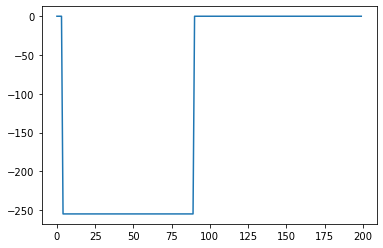

In [323]:
plt.plot(data-255)

# variance estimation

In [78]:
preproc_load.km_centers_local[pellet_idx]

[60, 60, 255]

0.01549614966030315 36.39482727075116


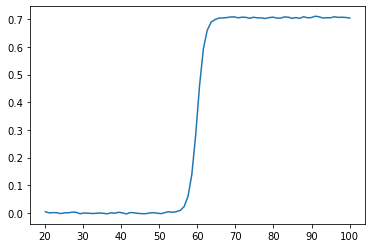

In [209]:
def hall(y):
  n = len(y)
  d = [0.1942, 0.2809, 0.3832, - 0.8582]
  sigma2 = 0
  for j in range(1,n-3):
    sigma2 += (d[0]*y[j+0] + d[1]*y[j+1] + d[2]*y[j+2] + d[3]*y[j+3])**2
  return 1/(n-3)*sigma2

def halldiff(y):
  n = len(y)
  d = [0.1942, 0.2809, 0.3832, - 0.8582]
  sigma2 = 0
  corrector = np.sqrt(d[3]**2 + (d[2]-d[3])**2 + (d[1]-d[2])**2 + (d[0]-d[1])**2 + d[0]**2)
  for j in range(1,n-4):
    sigma2 += (d[0]*(y[j+0+1]-y[j+0]) + d[1]*(y[j+1+1]-y[j+1]) + d[2]*(y[j+2+1]-y[j+2]) + d[3]*(y[j+3+1]-y[j+3]))**2
  return 1/(n-4)/corrector*sigma2

import inhib_diameter_modes

x = np.linspace(0,100,100)
y = inhib_diameter_modes.nlclsq.inhib_model([0,90,60,1, 20, 30], x, 255)
ymax = max(y)
y = y/ymax
y += y + np.random.randn(len(x))*0.002
plt.plot(x[20:],y[20:])
sigma = np.sqrt(halldiff(y[20:]))
beta = sigma * ymax * 2 * np.log(len(y))
print(sigma, beta)

In [254]:
np.concatenate([np.ones(2),np.zeros(3)])

array([1., 1., 0., 0., 0.])

# using on the pickles

In [20]:
import preprocess_img
jar = preprocess_img.PreprocResults("pickled_preprocs/")
preprocs = jar.get_all()

Loading pickles: 100%|██████████| 230/230 [00:10<00:00, 21.42it/s]


diameter = 28mm


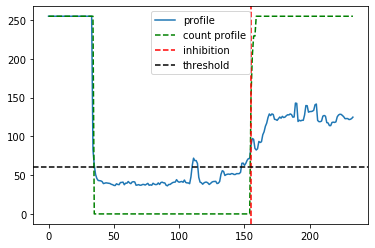

In [59]:
import preprocess_img
preproc = jar["20181022-SAU-203.JPG"]["preproc"]
pellet_idx = 5
y = np.array(astimp.radial_profile(preproc,pellet_idx,astimp.profile_type["max"]))
y_count = np.array(astimp.radial_profile(preproc,pellet_idx,astimp.profile_type["count"],
                  preproc.km_thresholds_local[pellet_idx]/255))

inhibDisk = astimp.measureOneDiameter(preproc, pellet_idx)
diameter = inhibDisk.diameter
confidence = inhibDisk.confidence

cp = diameter/2*preproc.px_per_mm

print("diameter = {:.0f}mm".format(diameter))
plt.plot(y, label="profile")
plt.plot(y_count, 'g--', label="count profile")
plt.axvline(cp, color = 'r', ls = '--', label="inhibition")
plt.axhline(preproc.km_thresholds_local[pellet_idx], color='k', ls='--', label="threshold")

plt.legend()

In [60]:
km_centers = []
for pickle in preprocs:
  preproc = pickle['preproc']
  for this in preproc.km_centers_local:
    km_centers.append(this)

In [61]:
import pandas as pd
km = pd.DataFrame(km_centers, columns=["inhib","bact","pellet"])

In [62]:
d = km.bact - km.inhib

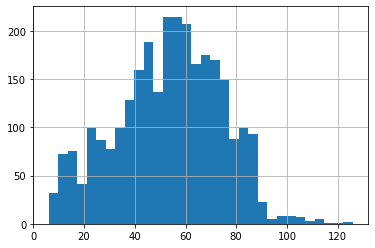

In [63]:
%matplotlib inline
d.hist(bins=32)

In [20]:
x = np.arange(10)
np.floor(x + 1)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [12]:
list()*10

[]